In [59]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
import numpy as np

url = "https://raw.githubusercontent.com/willi0815/studium/main/PurchaseData.csv"
ds = pd.read_csv(url)

ds.head()

,Age,Income,Student,Credit_rating,Buys_computer
0,<=30,High,No,Fair,No
1,<=30,High,No,Excellent,No
2,31...40,High,No,Fair,Yes
3,>40,Medium,No,Fair,Yes
4,>40,Low,Yes,Fair,Yes


In [ ]:
le = LabelEncoder()
le.fit(['<=30', '31...40', '>40', 'High', 'Medium', 'Low', 'Fair', 'Excellent', 'Yes', 'No'])
values = ds.values.reshape(-1, 1)
encoded_values = le.transform(values).reshape(-1, 5)
x = encoded_values[:, 0:4]
y = encoded_values[:, 4:5]



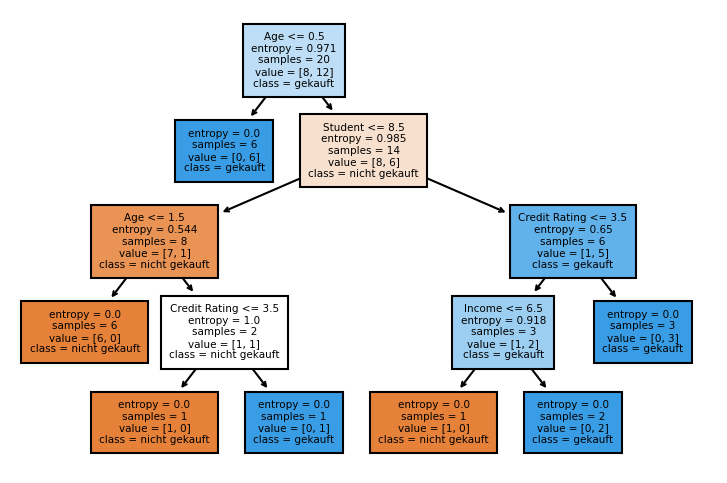

In [71]:
model = DecisionTreeClassifier(criterion="entropy")

model.fit(x, y)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(dpi=150)
plot_tree(model, 
          fontsize=5, 
          feature_names = ["Age","Income", "Student", "Credit Rating"], 
          class_names= ["nicht gekauft", "gekauft"], 
          filled = True)
plt.show()

In [77]:
import graphviz

tree = export_graphviz(model, 
                       None, 
                       feature_names=["Age","Income", "Student", "Credit Rating"],
                       class_names= ["nicht gekauft", "gekauft"], 
                       filled = True)
src = graphviz.Source(tree, format = "png")
src.render("./datei")

'./datei.png'